In [1]:
print("      ")

### Verify the environment

In [4]:
!conda env list

# conda environments:
#
base                     C:\Users\SAIRAM\anaconda3
MLForCloudDeployment_Heroku     C:\Users\SAIRAM\anaconda3\envs\MLForCloudDeployment_Heroku
Mask_App_Detector        C:\Users\SAIRAM\anaconda3\envs\Mask_App_Detector
WaferFaultDetection_new     C:\Users\SAIRAM\anaconda3\envs\WaferFaultDetection_new
boston_env               C:\Users\SAIRAM\anaconda3\envs\boston_env
churn_modelling_ANN   *  C:\Users\SAIRAM\anaconda3\envs\churn_modelling_ANN
flask_demo               C:\Users\SAIRAM\anaconda3\envs\flask_demo
pyspark_env              C:\Users\SAIRAM\anaconda3\envs\pyspark_env
tfod1.x                  C:\Users\SAIRAM\anaconda3\envs\tfod1.x
                         E:\OneNeuron\Boston House price\EndtoEnd_project\boston-house-pricing\boston_env1



### Verify the packages installed

In [5]:
!pip freeze

anyio @ file:///C:/ci/anyio_1644481921011/work/dist
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644551690056/work
asttokens==2.0.8
attrs @ file:///opt/conda/conda-bld/attrs_1642510447205/work
Babel @ file:///tmp/build/80754af9/babel_1620871417480/work
backcall @ file:///home/ktietz/src/ci/backcall_1611930011877/work
beautifulsoup4 @ file:///C:/ci/beautifulsoup4_1650293025093/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
brotlipy==0.7.0
certifi @ file:///C:/Windows/TEMP/abs_e9b7158a-aa56-4a5b-87b6-c00d295b01fanefpc8_o/croots/recipe/certifi_1655968940823/work/certifi
cffi @ file:///C:/Windows/Temp/abs_6808y9x40v/croots/recipe/cffi_1659598653989/work
charset-normalizer @ file:///tmp/build/80754af9/charset-normalizer_1630003229654/work
colorama @ file:///C:/Windows/TEMP/abs_9439aeb1-0254-449a-96f7-33ab5eb17fc8apleb4yn/croots/recipe/colorama_1657009099097/work
cryptography @ file://

### Import the required packages

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [127]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import ReLU, LeakyReLU, ELU, PReLU

In [10]:
print ('Version of Tensorflow is {}'.format(tf.__version__))

Version of Tensorflow is 2.10.0


In [12]:
dataset = pd.read_csv('Churn_Modelling.csv')
print('Shape of dataset is {}'.format(dataset.shape))
print('# of data points are {}'.format(dataset.shape[0]))
print('# of features are {}'.format(dataset.shape[1]))

Shape of dataset is (10000, 14)
# of data points are 10000
# of features are 14


In [13]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Quick stats

In [15]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [18]:
print(dataset['RowNumber'].nunique())
print(dataset['CustomerId'].nunique())

10000
10000


* Unique Rownumbers - cannot add value to the model - Exclude this feature

### Exploratory data analysis

In [51]:
dataset['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

* 20% of values are exited - Bit imbalanced dataset

### Age

<AxesSubplot:xlabel='Exited'>

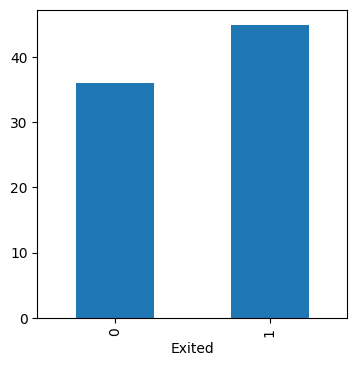

In [33]:
plt.figure(figsize=(4,4))
dataset.groupby('Exited')['Age'].median().plot(kind='bar')

* Median age differs for Exited & non-exited customers

### Tenure

In [37]:
print('Number of unique values of Tenure:', dataset['Tenure'].nunique())

Number of unique values of Tenure: 11


<AxesSubplot:xlabel='Tenure'>

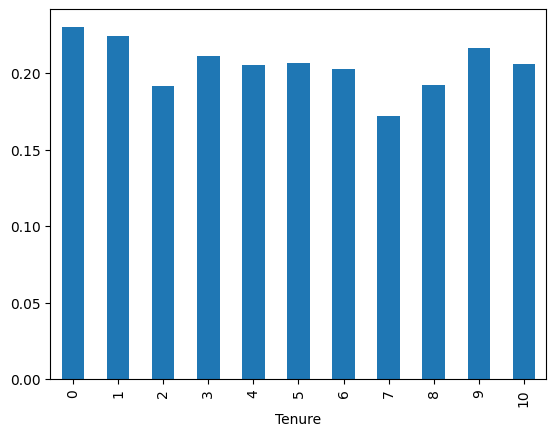

In [46]:
dataset.groupby('Tenure')['Exited'].mean().plot(kind='bar')

* Tenure alone cannot establish any strong signals regarding churn
* Customers with 0 years of tenure have an more avergae of existing probability (>22%)

### Balance

<AxesSubplot:xlabel='Exited'>

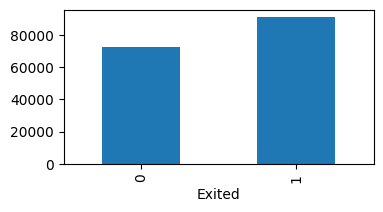

In [49]:
plt.figure(figsize=(4,2))
dataset.groupby('Exited')['Balance'].mean().plot(kind='bar')

* Customers with high balance are likely to part away from the company

### NumOfProducts

In [55]:
print('Number of unique values of NumOfProducts:', dataset['NumOfProducts'].nunique())

Number of unique values of NumOfProducts: 4


<AxesSubplot:title={'center':'Product=4'}, xlabel='Exited'>

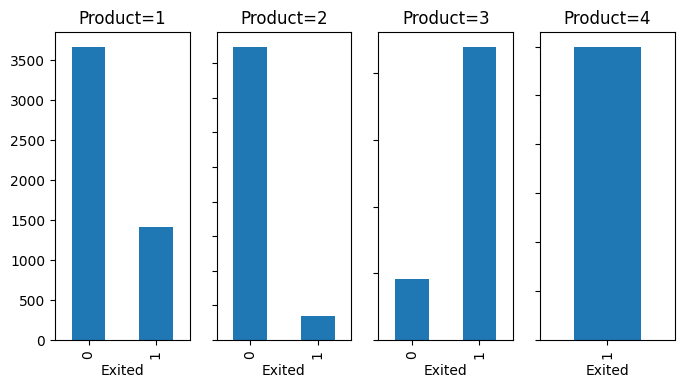

In [107]:
#dataset.groupby('NumOfProducts')['Exited'].mean().plot(kind='bar')

fig, axes = plt.subplots(1,4)
fig.set_size_inches(8,4)

temp = dataset[dataset['NumOfProducts'] == 1]
temp.groupby('Exited')['NumOfProducts'].count().plot(kind='bar', title='Product=1', ax=axes[0], sharey=True)

temp = dataset[dataset['NumOfProducts'] == 2]
temp.groupby('Exited')['NumOfProducts'].count().plot(kind='bar', title='Product=2', ax=axes[1])

temp = dataset[dataset['NumOfProducts'] == 3]
temp.groupby('Exited')['NumOfProducts'].count().plot(kind='bar', title='Product=3', ax=axes[2])

temp = dataset[dataset['NumOfProducts'] == 4]
temp.groupby('Exited')['NumOfProducts'].count().plot(kind='bar', title='Product=4', ax=axes[3])


* Customers with more number of products are likely to exit

### HasCrCard

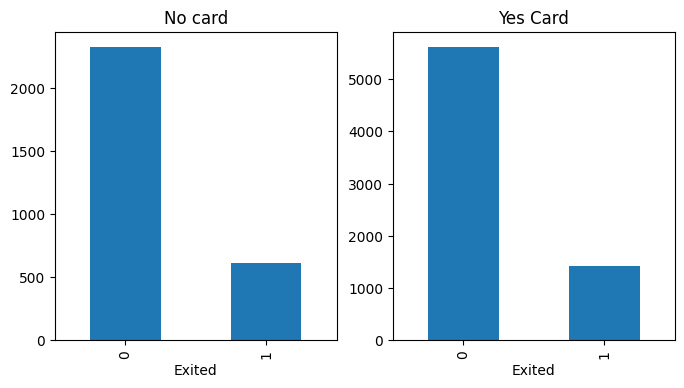

In [101]:
#plt.figure(figsize=(4,4))
#dataset.groupby('HasCrCard')['Exited'].mean().plot(kind='bar')

nrow = 1
ncol = 2

fig, axes = plt.subplots(nrow, ncol)
fig.set_size_inches(8,4)

temp = dataset[dataset['HasCrCard'] == 0]
temp.groupby('Exited')['HasCrCard'].count().plot(kind='bar', title='No card', ax=axes[0])

temp = dataset[dataset['HasCrCard'] == 1]
temp.groupby('Exited')['HasCrCard'].count().plot(kind='bar', title='Yes Card', ax=axes[1])

plt.show()


* Has card alone cannot explain anything related to churn

### IsActiveMember

In [63]:
dataset['IsActiveMember'].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

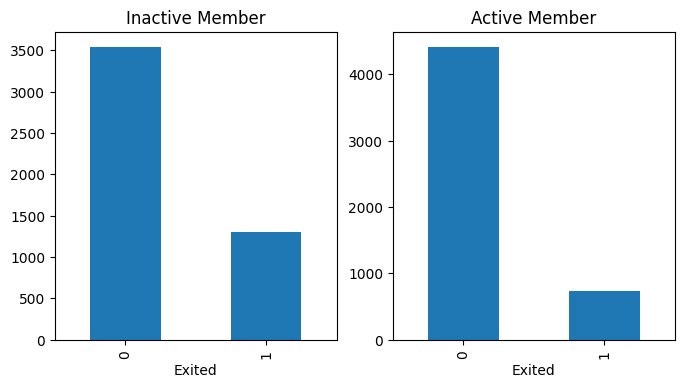

In [98]:
nrows=1
ncols=2

fig, axes = plt.subplots(nrows, ncols)
fig.set_size_inches(8,4)

temp = dataset[dataset['IsActiveMember'] == 0]
temp.groupby('Exited')['IsActiveMember'].count().plot(kind='bar', ax=axes[0], title='Inactive Member')

temp = dataset[dataset['IsActiveMember'] == 1]
temp.groupby('Exited')['IsActiveMember'].count().plot(kind='bar', ax=axes[1], title='Active Member')

plt.show()



* Inactive member are more likely to discontinue than active members

### Independent & dependent features

In [108]:
dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [110]:
X = dataset.drop(['RowNumber', 'CustomerId', 'Surname', 'Exited'], axis=1)
Y = dataset['Exited']

print('Shape of independent features {}'.format(X.shape))
print('Shape of  dependent features {}'.format(Y.shape))

X.head(), Y.head()

Shape of independent features (10000, 10)
Shape of  dependent features (10000,)


(   CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
 0          619    France  Female   42       2       0.00              1   
 1          608     Spain  Female   41       1   83807.86              1   
 2          502    France  Female   42       8  159660.80              3   
 3          699    France  Female   39       1       0.00              2   
 4          850     Spain  Female   43       2  125510.82              1   
 
    HasCrCard  IsActiveMember  EstimatedSalary  
 0          1               1        101348.88  
 1          0               1        112542.58  
 2          1               0        113931.57  
 3          0               0         93826.63  
 4          1               1         79084.10  ,
 0    1
 1    0
 2    1
 3    0
 4    0
 Name: Exited, dtype: int64)

In [113]:
X.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

### One hot encoding for categorical features

In [116]:
#Geography,   Gender                       

print(X['Geography'].nunique())
print(X['Gender'].nunique())


3
2


In [121]:
X=pd.get_dummies(X, columns=['Geography', 'Gender'], drop_first=True)
print(X.shape)
X.head()

(10000, 11)


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


### Train Test split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=17)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 11) (8000,)
(2000, 11) (2000,)


### Standardize the numeric features

In [139]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_train_std.head()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,1.931128,0.389652,1.387073,0.743964,0.809356,0.644926,-1.023527,0.793509,-0.577543,1.742506,0.91486
1,0.140166,1.527739,1.040759,-1.222370,0.809356,0.644926,0.977014,0.678504,-0.577543,-0.573886,0.91486
2,0.747446,-0.179391,-0.690809,0.289631,0.809356,0.644926,-1.023527,0.366412,1.731474,-0.573886,0.91486
3,0.119580,0.010290,0.001818,1.010968,0.809356,0.644926,0.977014,0.801416,1.731474,-0.573886,0.91486
4,-0.137742,2.001942,-0.690809,-1.222370,0.809356,0.644926,0.977014,-0.522841,-0.577543,-0.573886,0.91486


In [140]:
X_test_std = sc.transform(X_test)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)
X_test_std.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,-0.950880,-0.653594,-0.344496,0.506451,-0.909022,0.644926,0.977014,0.758985,1.731474,-0.573886,0.914860
1,1.200333,-1.791680,-0.690809,0.689791,0.809356,-1.550566,0.977014,0.869600,1.731474,-0.573886,0.914860
2,0.901840,-0.938115,-1.037123,-1.222370,0.809356,0.644926,0.977014,1.222855,-0.577543,-0.573886,0.914860
3,1.272383,0.389652,-1.383437,0.544955,-0.909022,-1.550566,-1.023527,0.149863,-0.577543,1.742506,-1.093063
4,-1.414060,0.863855,-1.037123,-1.222370,-0.909022,0.644926,0.977014,0.252690,-0.577543,1.742506,0.914860


* Without standardization, 6% accuracy was dropped - Different scales of data might have troubled the cost function to converge towards global minima

### Built architecture of model

In [182]:
# Initialize the sequential model
classifier = Sequential()

#Define input layer
classifier.add(Dense(units=11, activation='relu'))

#Define hideen layer-1
classifier.add(Dense(units=7, activation='relu'))
#classifier.add(Dropout(0.2))

#Define hideen layer-2
classifier.add(Dense(units=6, activation='relu'))

#Define output layer
classifier.add(Dense(units=1, activation='sigmoid'))

### Compile the model defined above

In [183]:
#Define the optimizer
adam_opt=tf.keras.optimizers.Adam(learning_rate=0.01)


#Compile the model defined with selected optimizer
classifier.compile(optimizer=adam_opt, loss='binary_crossentropy', metrics=['accuracy'])

### Early stopping - To stop the training when monitored metric doesn't improve

In [185]:
early_stopping = tf.keras.callbacks.EarlyStopping(
                 monitor="val_loss",
                 min_delta=0.0001,
                 patience=50,
                 verbose=1,
                 mode="auto",
                 baseline=None,
                 restore_best_weights=False,
                )

In [186]:
model_fit = classifier.fit(X_train_std, y_train, validation_split=0.3, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
560/560 [==============================] - 3s 3ms/step - loss: 0.4175 - accuracy: 0.8175 - val_loss: 0.3806 - val_accuracy: 0.8462
Epoch 2/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3740 - accuracy: 0.8527 - val_loss: 0.3711 - val_accuracy: 0.8504
Epoch 3/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3644 - accuracy: 0.8557 - val_loss: 0.3599 - val_accuracy: 0.8525
Epoch 4/1000
560/560 [==============================] - 1s 2ms/step - loss: 0.3581 - accuracy: 0.8580 - val_loss: 0.3629 - val_accuracy: 0.8537
Epoch 5/1000
560/560 [==============================] - 1s 2ms/step - loss: 0.3541 - accuracy: 0.8614 - val_loss: 0.3582 - val_accuracy: 0.8550
Epoch 6/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3506 - accuracy: 0.8609 - val_loss: 0.3568 - val_accuracy: 0.8550
Epoch 7/1000
560/560 [==============================] - 1s 2ms/step - loss: 0.3486 - accuracy: 0.8604 - val_loss: 0.3581 - val_accuracy:

560/560 [==============================] - 2s 3ms/step - loss: 0.3218 - accuracy: 0.8691 - val_loss: 0.3728 - val_accuracy: 0.8542
Epoch 58/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3225 - accuracy: 0.8691 - val_loss: 0.3772 - val_accuracy: 0.8554
Epoch 59/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3207 - accuracy: 0.8723 - val_loss: 0.3700 - val_accuracy: 0.8558
Epoch 60/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3224 - accuracy: 0.8686 - val_loss: 0.3622 - val_accuracy: 0.8571
Epoch 61/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3247 - accuracy: 0.8686 - val_loss: 0.3822 - val_accuracy: 0.8537
Epoch 62/1000
560/560 [==============================] - 1s 3ms/step - loss: 0.3221 - accuracy: 0.8704 - val_loss: 0.3911 - val_accuracy: 0.8525
Epoch 63/1000
560/560 [==============================] - 2s 3ms/step - loss: 0.3244 - accuracy: 0.8684 - val_loss: 0.3646 - val_accuracy: 0.8546

In [187]:
classifier.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (10, 11)                  132       
                                                                 
 dense_13 (Dense)            (10, 7)                   84        
                                                                 
 dense_14 (Dense)            (10, 6)                   48        
                                                                 
 dense_15 (Dense)            (10, 1)                   7         
                                                                 
Total params: 271
Trainable params: 271
Non-trainable params: 0
_________________________________________________________________


In [188]:
print(model_fit.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


### Plot for accuracy

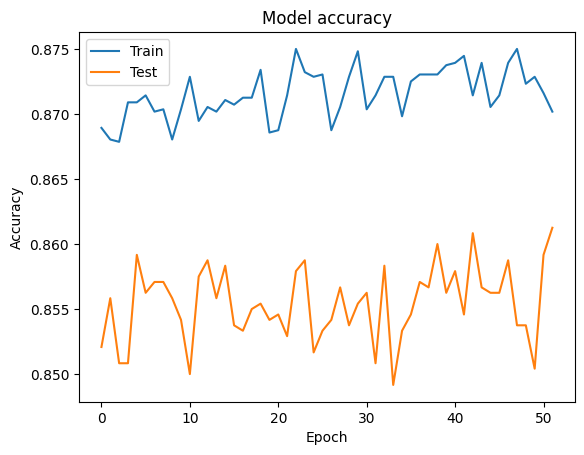

In [160]:
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Plot for loss

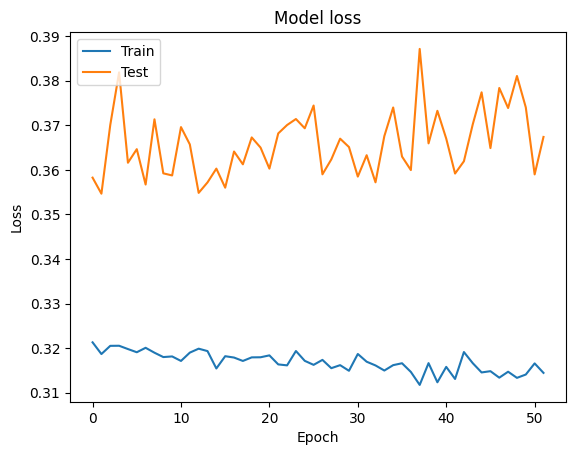

In [161]:
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### Predict the test data

In [166]:
y_pred = classifier.predict(X_test_std)
y_pred[0:5]

63/63 [==============================] - 0s 1ms/step


array([[0.24762996],
       [0.0026145 ],
       [0.00121646],
       [0.47703487],
       [0.46503848]], dtype=float32)

In [167]:
y_pred = (y_pred >= 0.5)
y_pred[0:5]

array([[False],
       [False],
       [False],
       [False],
       [False]])

### Evaluation matrix

In [169]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1515,   71],
       [ 246,  168]], dtype=int64)

In [171]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1586
           1       0.70      0.41      0.51       414

    accuracy                           0.84      2000
   macro avg       0.78      0.68      0.71      2000
weighted avg       0.83      0.84      0.82      2000



* Due to class imbalance model is not performing well for class 1 (churn class)

In [190]:
classifier.get_weights()

[array([[-0.90764236, -0.2449298 , -1.0462626 ,  0.86224276, -1.2253345 ,
          0.07034295,  2.2267892 , -0.57556564, -0.33522493, -0.56840473,
          0.93934304],
        [ 1.0785185 , -5.671017  , -3.0022216 ,  0.89405316, -0.56196994,
         -0.5901492 , -0.72776663, -5.050076  ,  3.0561218 ,  1.5436132 ,
          2.0288663 ],
        [ 0.33331805, -0.6916176 ,  2.4621034 , -0.86119705, -1.1372818 ,
          0.09575431,  0.8798543 ,  0.79717875,  0.5032983 ,  0.00741457,
          0.29791114],
        [-1.7771224 ,  0.64139915, -0.3043456 , -0.7604248 , -0.5538081 ,
         -2.0529869 ,  0.3426946 ,  1.0539902 ,  0.29327926,  2.192562  ,
         -1.1924863 ],
        [-4.4796386 ,  0.246717  ,  1.3910701 , -0.07687058,  3.7313406 ,
          3.6865313 ,  0.85795665,  1.0896004 ,  0.6553135 ,  4.3374953 ,
          0.5213394 ],
        [-0.63717884, -0.27274695,  1.2163798 , -1.2527933 , -1.421678  ,
         -0.27412748, -1.7133596 , -0.88863766, -0.3911547 , -0.2806275